In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [77]:
df.to_csv("HousingData_Clean.csv")

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
df = df.fillna(df.mean()) # Her alanı o alanın ortalaması ile doldur!
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
X = df.drop(columns = ["MEDV"])
y = df["MEDV"]


In [14]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [15]:
df.shape

(506, 14)

In [16]:
#Veriyi Train ve Test split etmek.
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [18]:
# Random Seed -> Rastgeleliği belirleyen bir çıkış noktası gibi. random_state = 42

In [23]:
X_train.shape

(354, 13)

In [24]:
X_test.shape

(152, 13)

In [25]:
#Lineer Regresyon
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

# Git eğitildiğin gibi şu X_tet verileriyle tahminler yap ve bana ver.

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
# MAE
mae = mean_absolute_error(y_test,y_pred) # Ortalama mutlak hata

# MSE 
mse = mean_squared_error(y_test,y_pred) # Aynı hataların karesinin alınmış hali. Aykırı değerleri daha rahat görmemizi sağlar.
mae,mse

# Bu skorlar ne kadar düşükse modelim o kada iyi çalışıyor!

(3.141052567108427, 21.818457953525787)

In [39]:
import matplotlib.pyplot as plot

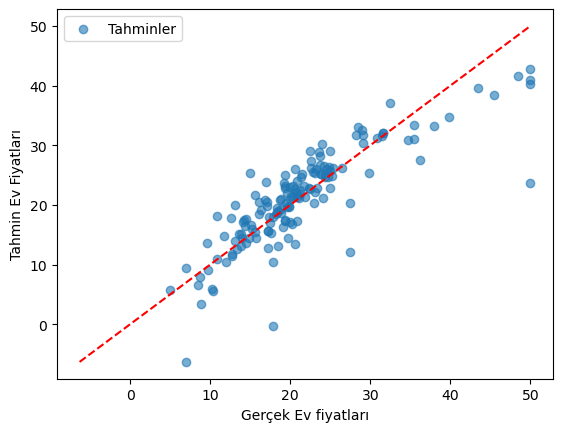

In [48]:
plot.scatter(y_test,y_pred, label = "Tahminler", alpha = 0.6)
plot.xlabel("Gerçek Ev fiyatları")
plot.ylabel("Tahmin Ev Fiyatları")
plot.legend()

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plot.plot([min_val,max_val],[min_val,max_val],color = "red", linestyle = "--")
plot.show()

In [51]:
coef_df = pd.DataFrame(model.coef_,X.columns, columns= ["Katsayı"])
coef_df

# CRIM değeri (-) -> yükseldikçe (+) fiyat (-) azalır -> Ters orantı
# ZN değeri (+) -> yükseldikçe (+) fiyat (+) azalır -> Doğru orantı

,Katsayı
CRIM,-0.128803
ZN,0.031913
INDUS,-0.010805
CHAS,3.689188
NOX,-13.963873
RM,4.418486
AGE,-0.026106
DIS,-1.432754
RAD,0.196898
TAX,-0.007219


In [52]:
import numpy as np

In [53]:
X_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04


In [66]:
new_house = np.array(
    [[0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5,296,16.6,395.5,9.04]]
)

In [67]:
feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
new_house_df = pd.DataFrame(new_house, columns= feature_names)
new_house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,11.083992,0.0,0.51,6.416,68.518519,2.6463,5.0,296.0,16.6,395.5,9.04


In [74]:
model.predict(new_house_df)

array([28.94684243])

In [75]:
new_house_dict = { # DAHA RAHAT BİR SYNTAX
    "CRIM":0.09,
    "ZN":0,
    "INDUS":11,
    "CHAS":0,
    "NOX":1.51,
    "RM":8.4,
    "AGE":68,
    "DIS":2.64,
    "RAD":5,
    "TAX":296,
    "PRTRATIO":16.6,
    "B":395.5,
    "LSTAT":9.04
}
new_df = pd.DataFrame([new_house_dict])
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRTRATIO,B,LSTAT
0,0.09,0,11,0,1.51,8.4,68,2.64,5,296,16.6,395.5,9.04


In [76]:
model.predict(new_house_df)

array([28.94684243])